##### Import the required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [2]:
#Loading the dataset
df = pd.read_csv('titanic-training-data.csv')


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### now decide which data we require and which is not required

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### check for missing values

##### checking the result from info we can find which column has missing values

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### analyse the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

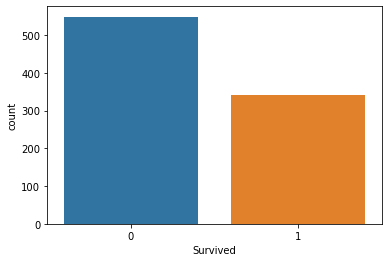

In [7]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

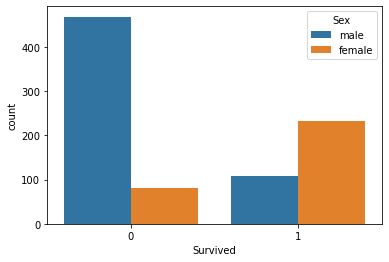

In [8]:
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

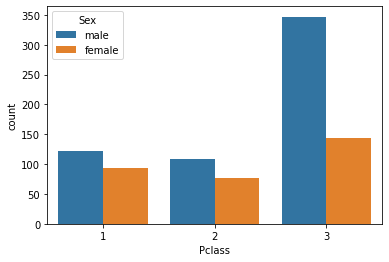

In [9]:
sns.countplot(x='Pclass',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

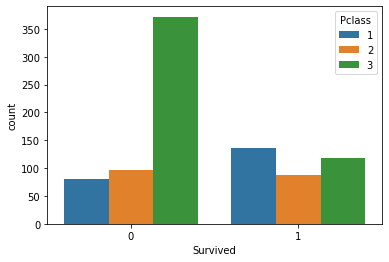

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

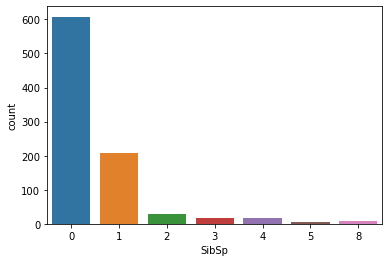

In [11]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

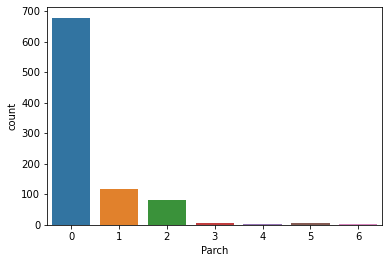

In [12]:
sns.countplot(x='Parch',data=df)

### Data wrangling

In [13]:
#method to find missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

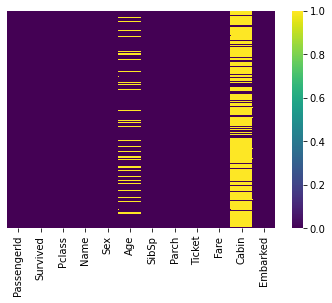

In [14]:
#finding missing values using visualisation
#heatmap
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:>

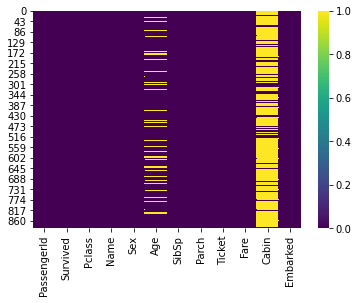

In [15]:
sns.heatmap(df.isnull(),cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

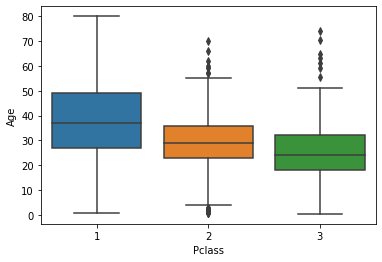

In [16]:
sns.boxplot(x='Pclass',y='Age',data=df)

#### because cabin has large number of missing values so we decided to drop it

In [17]:
df.drop("Cabin", axis=1, inplace=True)    #axis=1 represents column #inplace=True means it will change the dataset

#####  now we drop all missing values including 'age' and 'embarked'

In [18]:
df.dropna(inplace=True)

##### now check with help of heat map if there is still missing values or not

<AxesSubplot:>

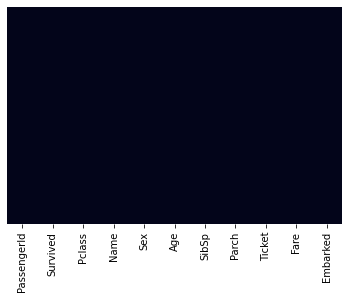

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [20]:
df.shape

(712, 11)

#### Now we will do one hot encoding

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
sex=pd.get_dummies(df["Sex"])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


#### Instead of sex column we are getting 2 columns of male and female. We will remove female column so that we have left only male column. If it is male the number will be '1' if its '0' then its not a male.

In [23]:
Sex=pd.get_dummies(df["Sex"],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [24]:
Embarked=pd.get_dummies(df["Embarked"])   #variable name we can decide
Embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [25]:
Embarked=pd.get_dummies(df["Embarked"],drop_first=True)
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
Pclass=pd.get_dummies(df["Pclass"])
Pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [27]:
Pclass=pd.get_dummies(df["Pclass"],drop_first=True)
Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


#### Now we will add all the columns

In [28]:
df=pd.concat([df,Sex,Embarked,Pclass],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [29]:
df.drop(["Sex","Embarked","PassengerId","Pclass","Ticket","Fare"],axis=1,inplace=True)
df.head()

,Survived,Name,Age,SibSp,Parch,male,Q,S,2,3
0,0,"Braund, Mr. Owen Harris",22.0,1,0,1,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,0,0,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,1,0,1,0,1


In [30]:
df.drop(["Name"],axis=1,inplace=True)
df.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


#### Split the data

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [33]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,SibSp,Parch,male,Q,S,2,3
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,2.584933e-16,4.216353e-16,-1.372186e-17,5.083325e-17,-4.740278e-17,7.921254e-17,1.425202e-16,-1.668453e-16
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-2.017717e+00,-5.527137e-01,-5.067874e-01,-1.322511e+00,-2.023257e-01,-1.872519e+00,-5.665375e-01,-9.971949e-01
25%,-6.657639e-01,-5.527137e-01,-5.067874e-01,-1.322511e+00,-2.023257e-01,5.340398e-01,-5.665375e-01,-9.971949e-01
50%,-1.133826e-01,-5.527137e-01,-5.067874e-01,7.561375e-01,-2.023257e-01,5.340398e-01,-5.665375e-01,-9.971949e-01
75%,5.770939e-01,5.225108e-01,6.647471e-01,7.561375e-01,-2.023257e-01,5.340398e-01,-5.665375e-01,1.002813e+00
max,3.477095e+00,4.823409e+00,6.522419e+00,7.561375e-01,4.942527e+00,5.340398e-01,1.765108e+00,1.002813e+00


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

## Build kNN Model

In [39]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance', metric='euclidean' )   #chose odd numbers for n_n

In [40]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

## Evaluate Performance of kNN Model

In [41]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7336448598130841

<AxesSubplot:>

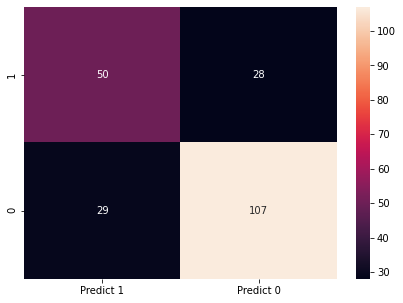

In [44]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,predicted_labels, labels=[1,0])

df_cm = pd.DataFrame(cm, index=[i for i in ['1','0']],
                    columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')